In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

In [5]:
# Load data
df = pd.read_csv("../data/raw/data.csv")  # Replace with actual file path
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
 # Check types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
# Summary stats
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [8]:
# Preview
df.head

<bound method NDFrame.head of               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX          2

In [9]:
 # Count missing values per column
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

In [12]:
print(df.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [13]:
cols_to_drop = ['unnecessary_col']  # or any other columns you're unsure about
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols, inplace=True)


In [14]:
# Drop rows with any missing value
df.drop(columns=['unnecessary_col'], errors='ignore', inplace=True)


In [15]:
print(df.columns.tolist())


['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']


In [16]:
cols_to_drop = ['col1', 'col2', 'unnecessary_col']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


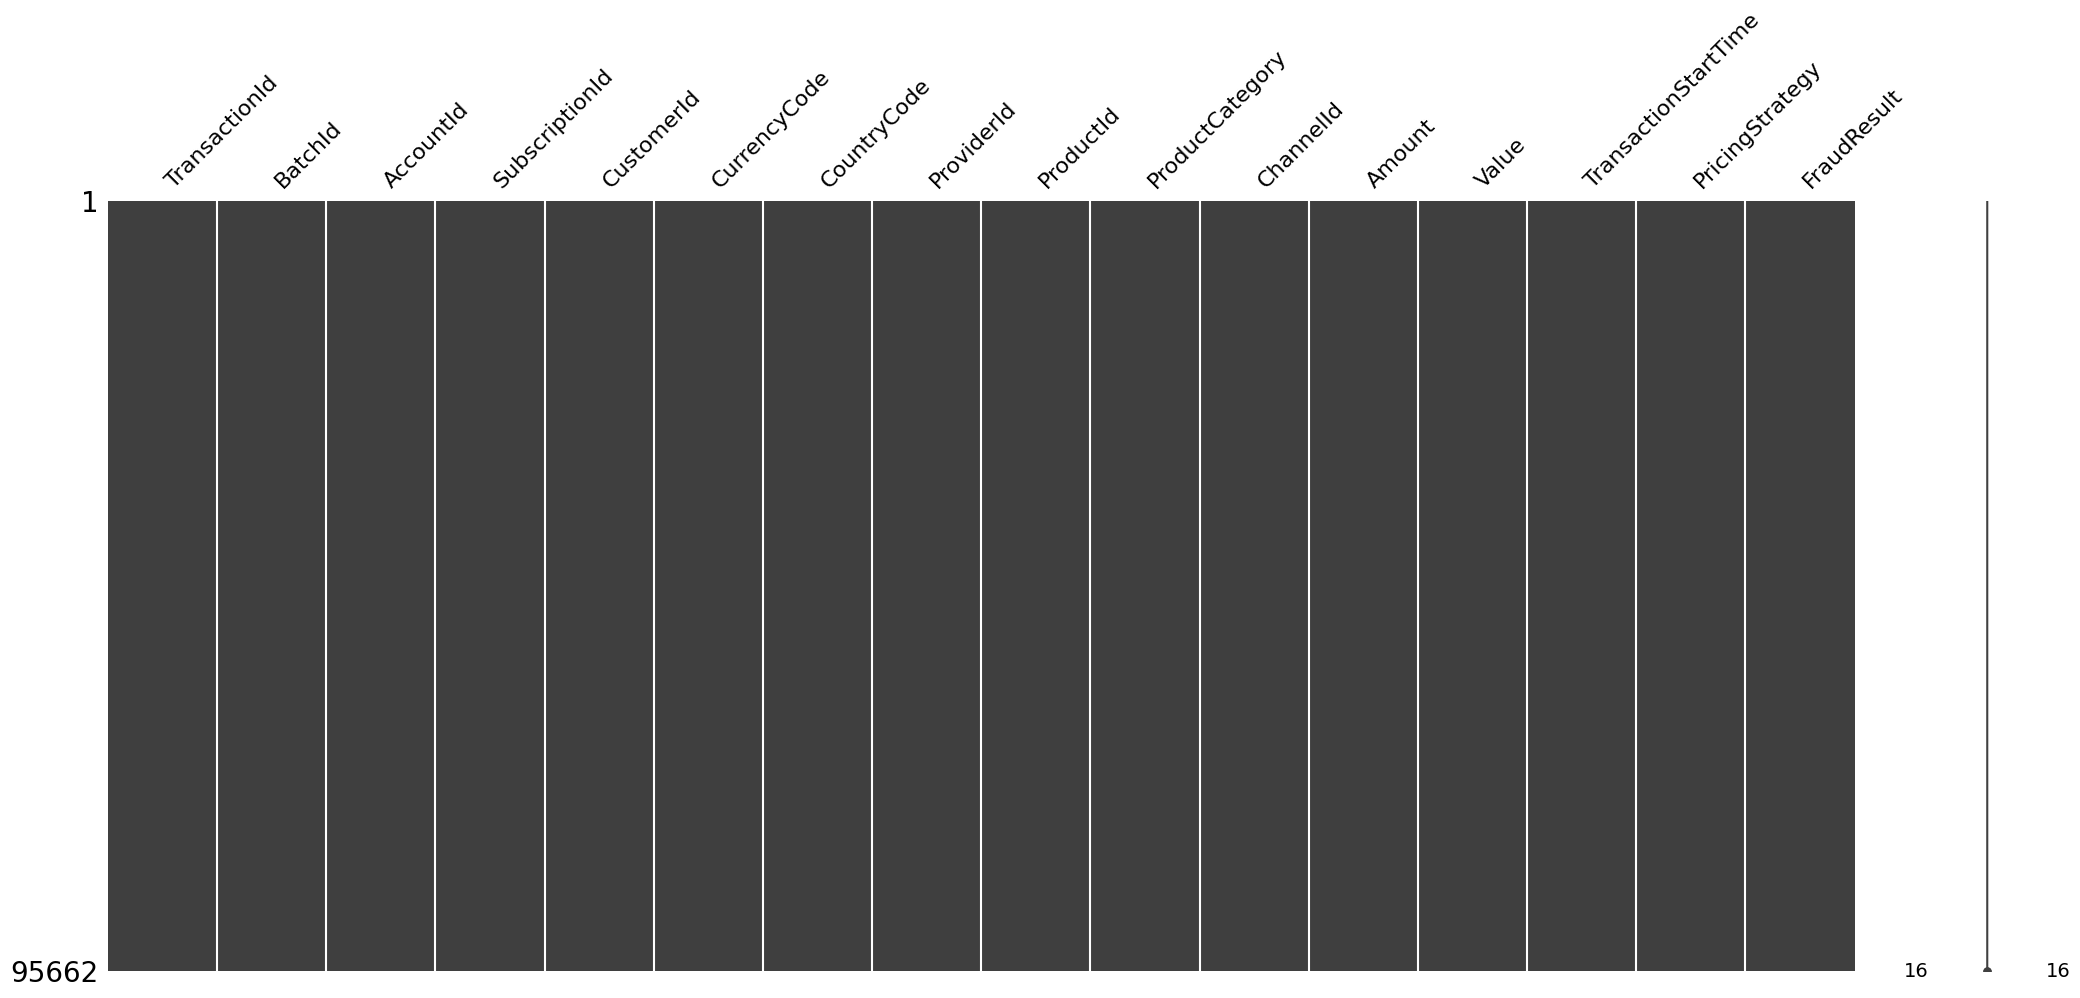

In [17]:
# Visualize Missing Data
import missingno as msno
msno.matrix(df)
plt.show()


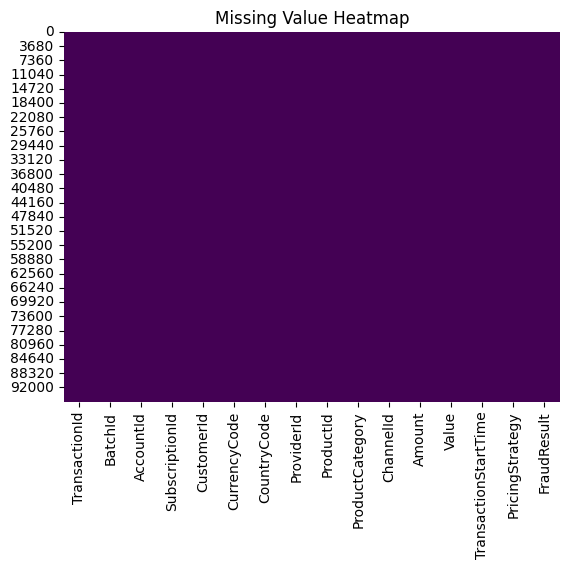

In [20]:
# Check for Missing Values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

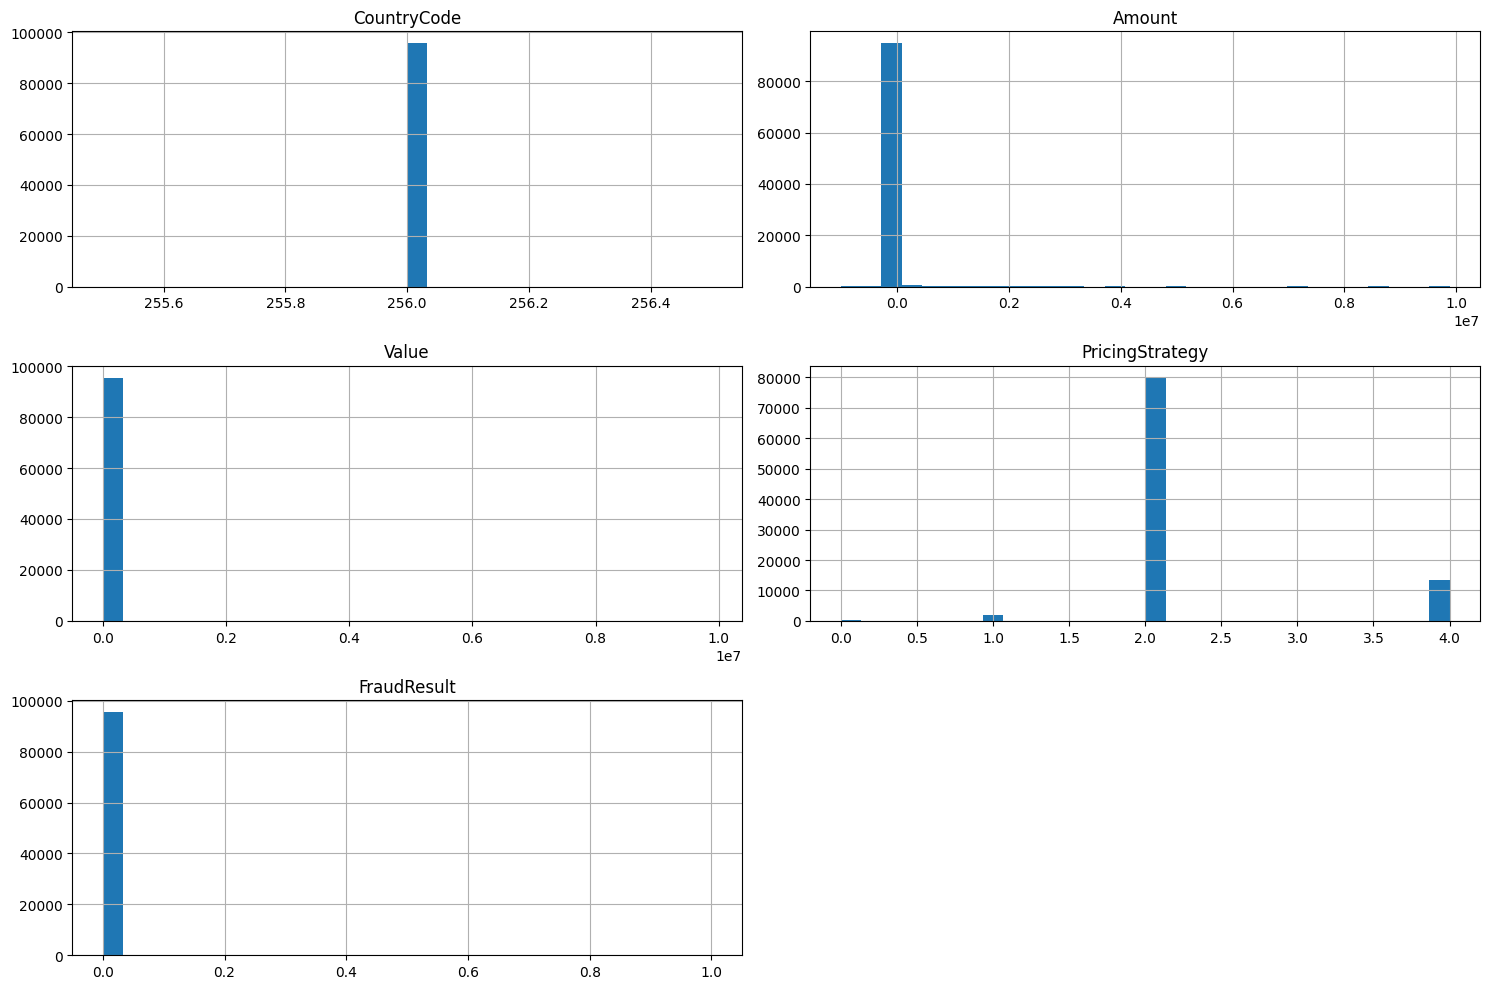

In [18]:
# Univariate Analysis
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


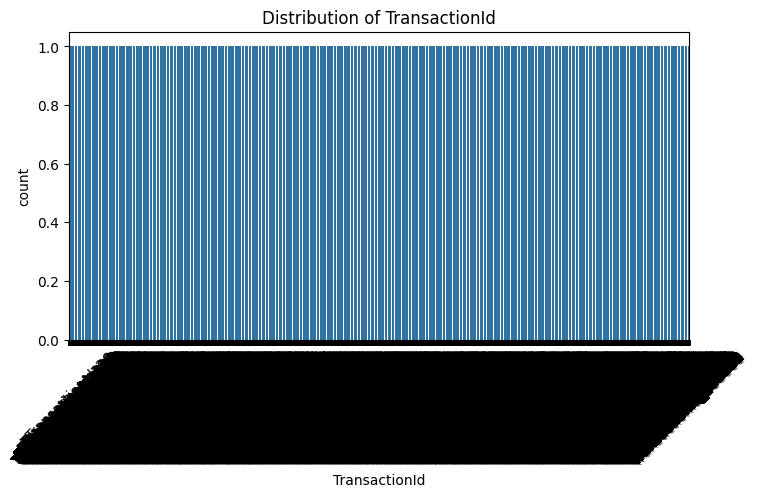

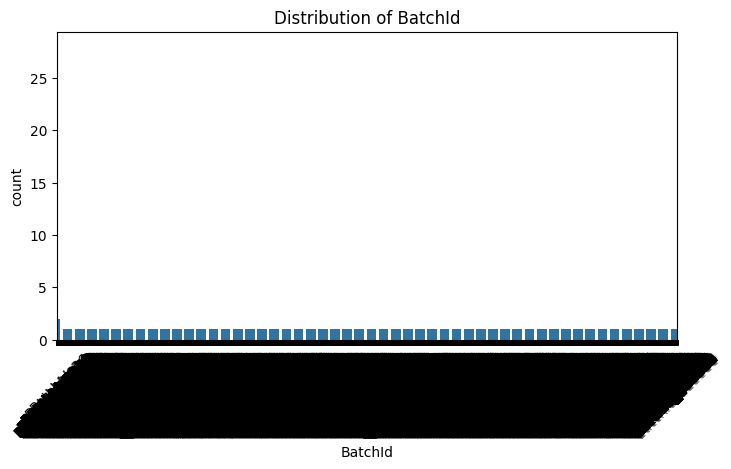

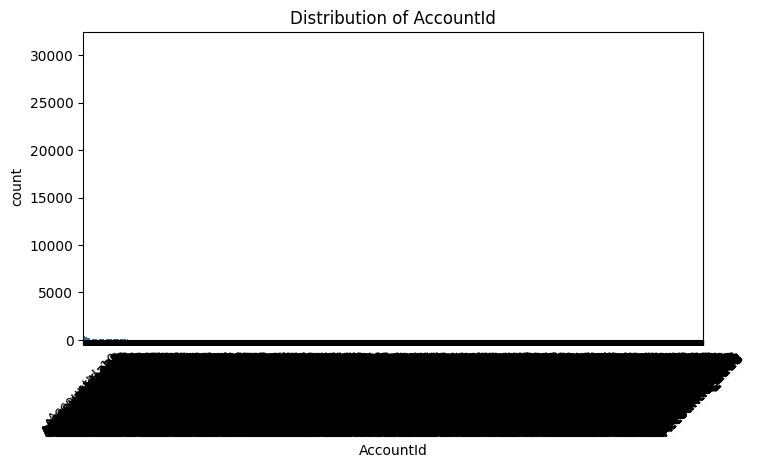

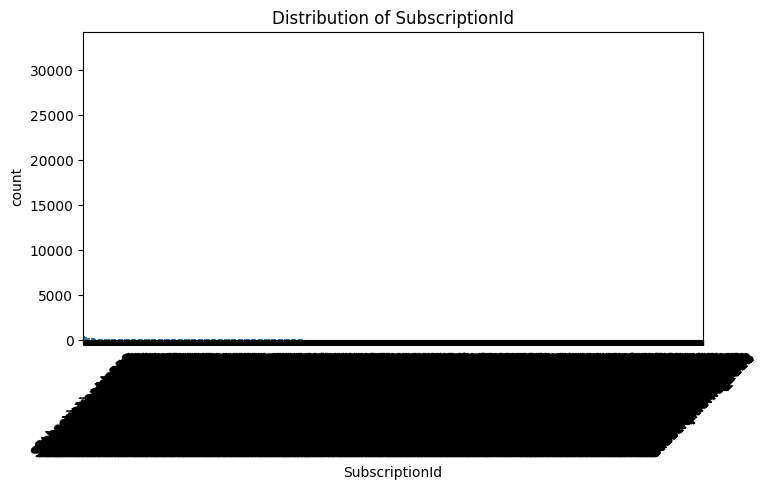

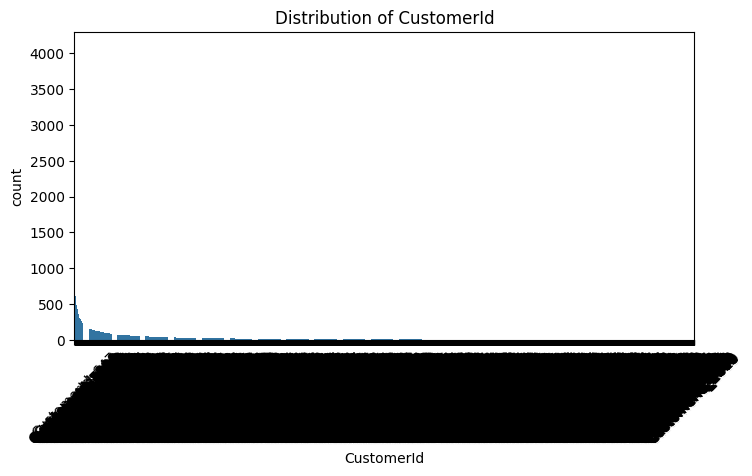

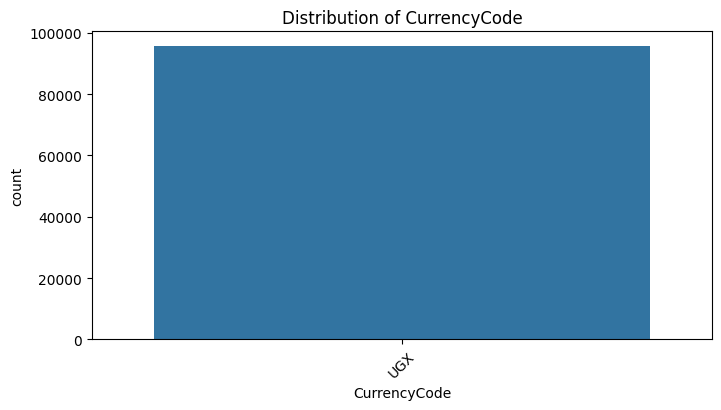

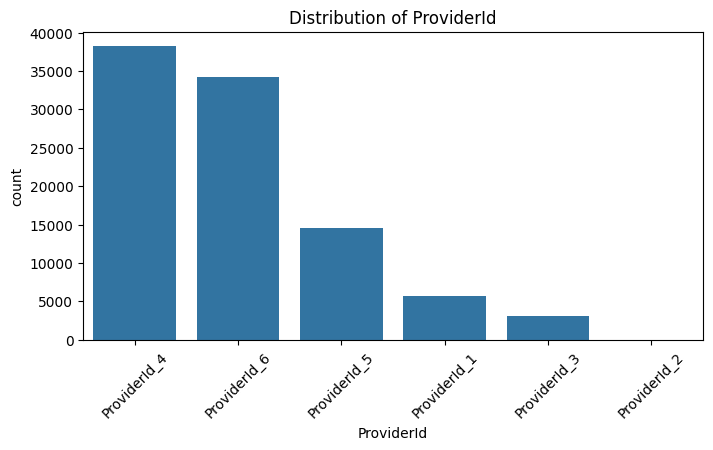

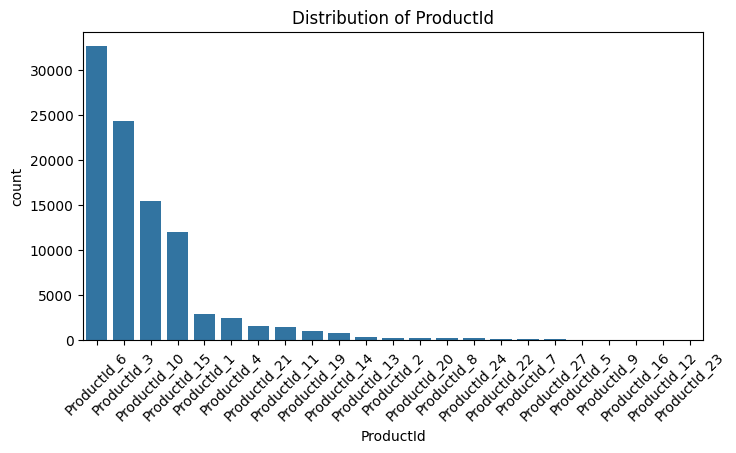

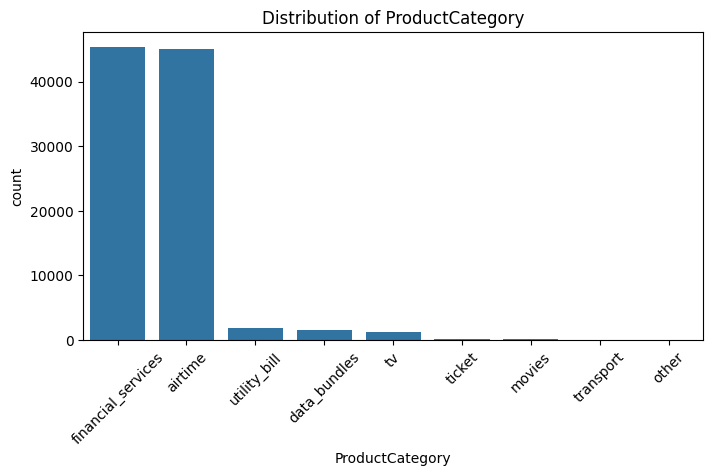

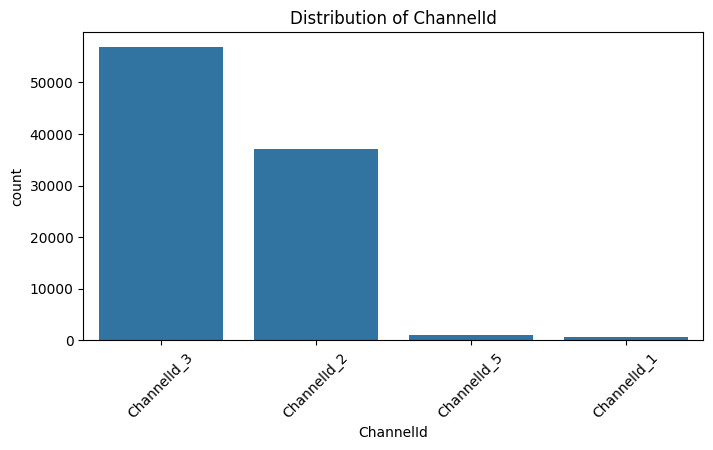

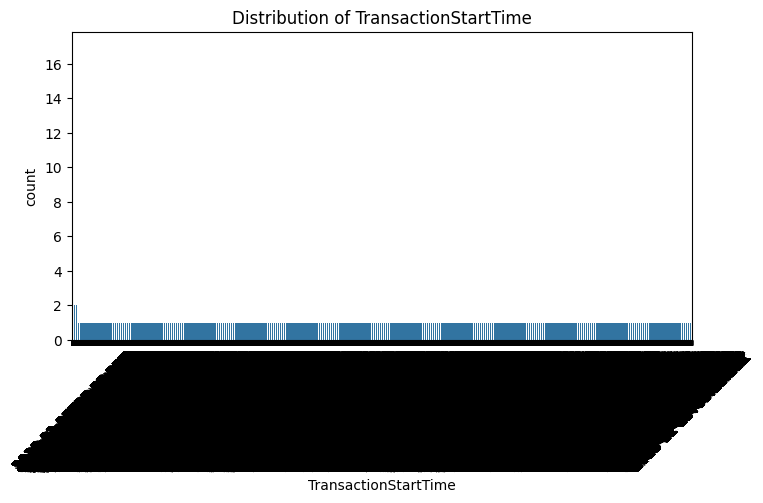

In [19]:
# Categorical Features
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [25]:
print(df.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


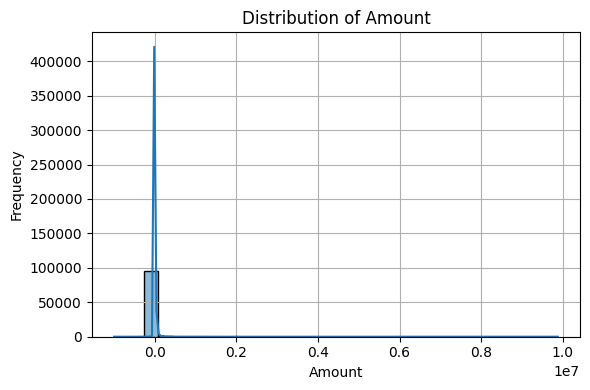

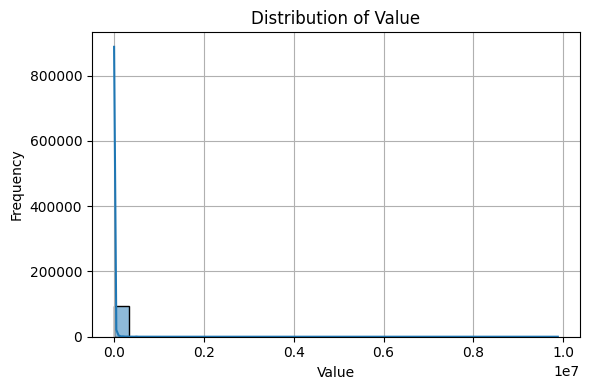

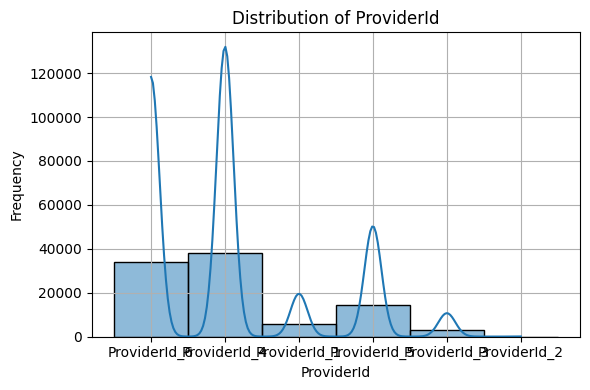

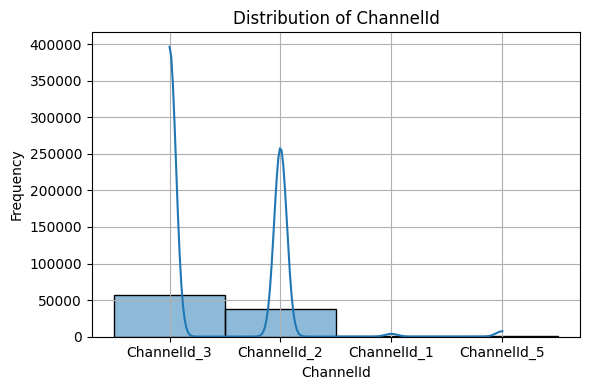

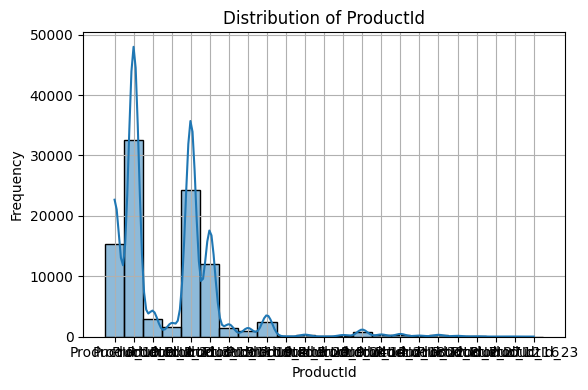

In [ ]:
# Distribution of Numerical Features

import matplotlib.pyplot as plt
import seaborn as sns

features = ['Amount', 'Value', 'ProviderId', 'ChannelId', 'ProductId']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


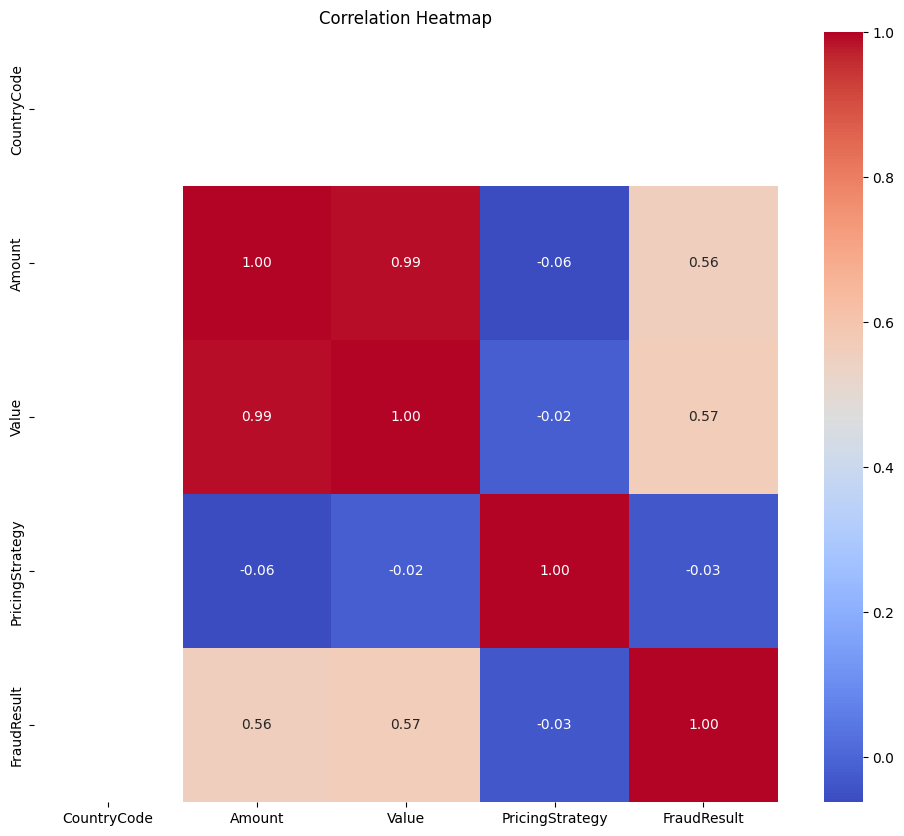

In [21]:
#Bivariate Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [22]:
print(df.columns.tolist())


['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']


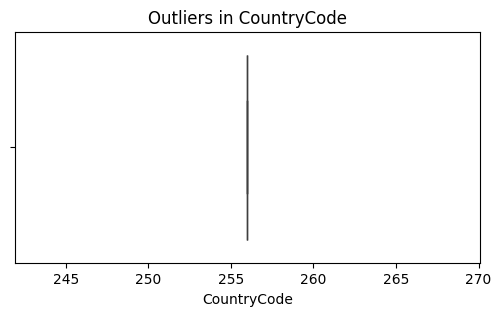

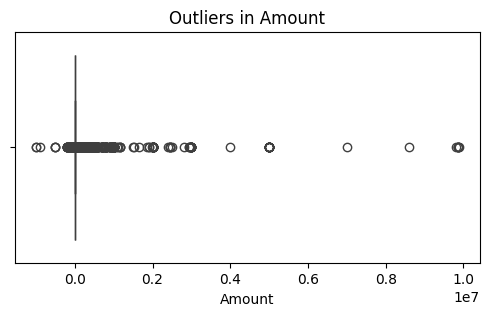

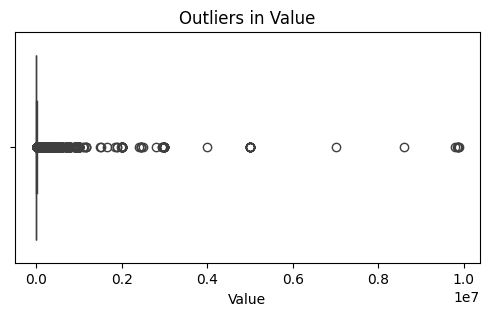

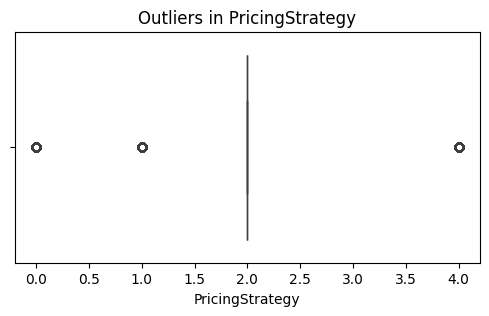

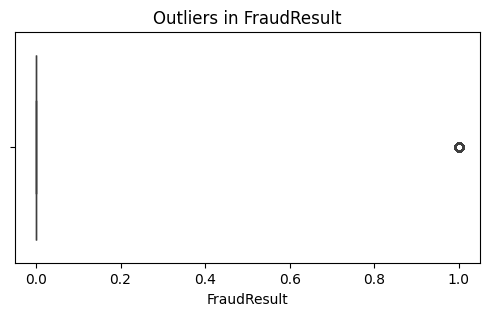

In [30]:
# Outlier Detection
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


In [ ]:
# Save Preprocessed Data
os.makedirs("data/processed", exist_ok=True)
df.to_csv("..data/processed/cleaned_data.csv", index=False)